# **Phising Website Detection**




web phishing is one of many security threats to web services on the internet. web phishing aims to steal private information such as username, passwords, credit card details, by way of impersonating a legitimate entity. This project mainly mainly focuses on applying a machine learning frameworks on how to detect phising websites.
In this project we will look at:



1.   logistic regression
2.   decision tree
3.   random forest classifier 










[link text](https://)The data for this excercise is taken from UCI website (https://archive.ics.uci.edu/ml/datasets/phishing+websites.).




```
# This is formatted as code
```

## **Importing Required Libraries and accesing files from Google Drive** 


In [ ]:
#importing basic required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Filter the uneccesary warnings
import warnings
warnings.filterwarnings("ignore")

# **uploading data from local drive**

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Phishing.csv to Phishing (2).csv


In [ ]:
import io

In [ ]:
Phishing_df = pd.read_csv(io.BytesIO(uploaded['Phishing.csv']))

#**Studying the trends in the data**

In [ ]:
Phishing_df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
having_IP_Address,-1,1,1,1,1,-1,1,1,1,1
URL_Length,1,1,0,0,0,0,0,0,0,1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1
Favicon,1,1,1,1,1,1,1,1,1,1


**Checking for null values in the dataframe**

In [ ]:
Phishing_df.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [ ]:
#Basic info about the Dataframe
Phishing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [ ]:
#Using Describe Method to see patterns in data along with min,max and quarlitles for each column
Phishing_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


In [ ]:
#Checking the values in Results column
Phishing_df["Result"].unique()

array([-1,  1])

In [ ]:
x,y=0,0 #setting individual couter values to 0

In [ ]:
#grouping data according to Result labels
cls=[(1,x),(-1,y)]
for i in range(0,len(Phishing_df)): #this loop functions as a counnter loop
  if Phishing_df['Result'].iloc[i]==1:
    x=x+1
  else:
    y=y+1
cls

[(1, 0), (-1, 0)]

In [ ]:
#the above code can simply be written using inbuilt function counter
from collections import Counter
classes=Counter(Phishing_df["Result"].values)
class_dist=pd.DataFrame(classes.most_common(),columns=["Class","Num_of_Observations"])
class_dist

,Class,Num_of_Observations
0,1,6157
1,-1,4898


# **Basic Plots and Graphical Representation of Relations**

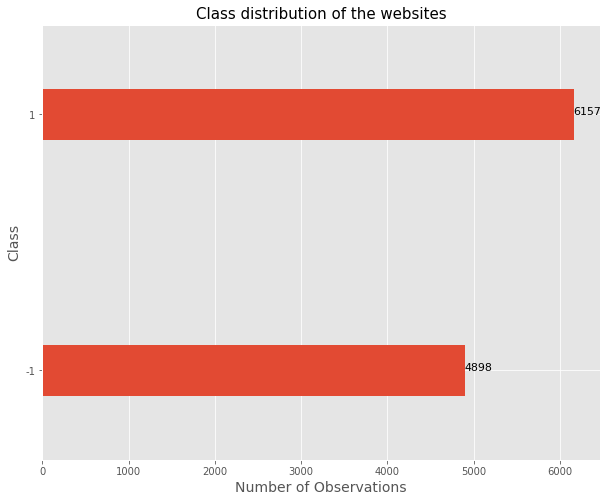

In [ ]:
#plotting the class distribution of each class
plt.style.use('ggplot')

subplot = class_dist.groupby('Class')['Num_of_Observations'].sum().plot(kind='barh', width=0.2, figsize=(10,8))

subplot.set_title('Class distribution of the websites', fontsize = 15)
subplot.set_xlabel('Number of Observations', fontsize = 14)
subplot.set_ylabel('Class', fontsize = 14)

for i in subplot.patches:
  subplot.text(i.get_width()+0.1, i.get_y()+0.1, \
               str(i.get_width()), fontsize=11)


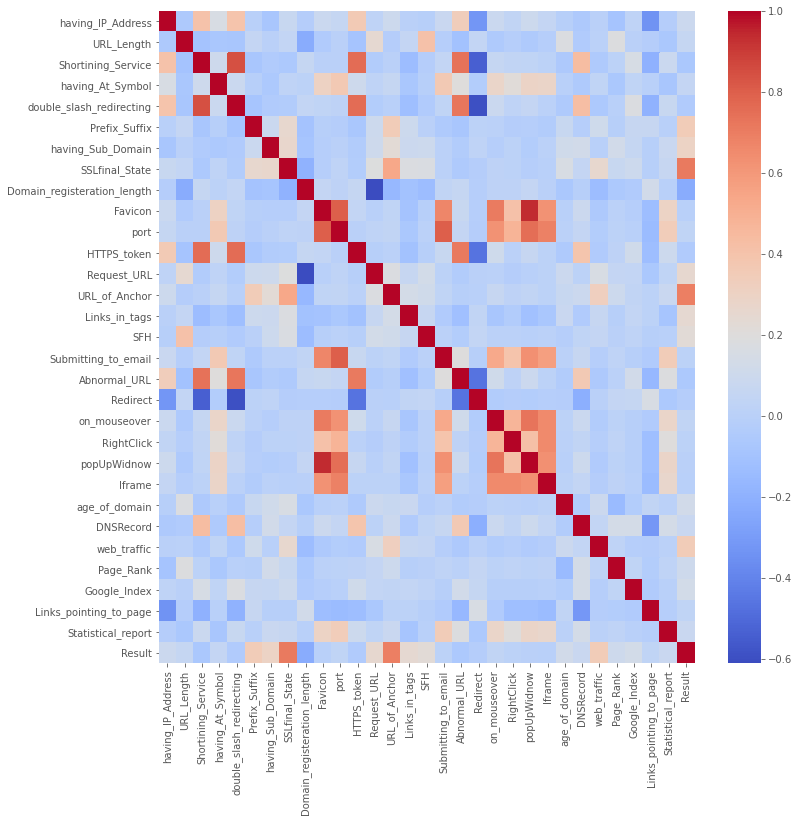

In [ ]:
#heatmap of correlation between columns of data
plt.figure(figsize=(12,12))
sns.heatmap(Phishing_df.corr(),cmap="coolwarm")

# **Processing the Data and splitting into Training and Testing Data**

Generally Machine Learning Classifiers have trouble interpreting the -1 and 1 values used in the Result column, basically it expects 0 and 1 labels

In [ ]:
#using .map function to change -1 values to 0
Phishing_df['Result'] = Phishing_df['Result'].map({-1:0, 1:1})
Phishing_df['Result'].unique()

array([0, 1])

Splitting the Data into Training and Test Dataframes.

In [ ]:
from sklearn.model_selection import train_test_split
X=Phishing_df.drop("Result",axis=1).values
y=Phishing_df["Result"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# **Logistic Regression**

 **logistic Regression** is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.
# **Logistic Regression Assumptions**
1. Binary logistic regression requires the dependent variable to be binary.
2. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
3. Only the meaningful variables should be included.
4. The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
5. The independent variables are linearly related to the log odds.
6. Logistic regression requires quite large sample sizes.


Building Logistic Regression Mode

In [ ]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score
print('Accuracy score of the Logistic Regression classifier with default hyperparameter values {0:.2f}%'.format(accuracy_score(y_test, lm.predict(X_test))*100.))
print('F1 score of the Logistic Regression classifier with default hyperparameter values {0:.2f}%'.format(f1_score(y_test, lm.predict(X_test))*100.))
print('\n')
print('----Classification report of the Logistic Regression classifier with default hyperparameter value----')
print('\n')
print(classification_report(y_test, lm.predict(X_test), target_names=['Phishing Websites', 'Normal Websites']))
print(confusion_matrix(y_test, lm.predict(X_test)))

Accuracy score of the Logistic Regression classifier with default hyperparameter values 92.22%
F1 score of the Logistic Regression classifier with default hyperparameter values 93.10%


----Classification report of the Logistic Regression classifier with default hyperparameter value----


                   precision    recall  f1-score   support

Phishing Websites       0.92      0.91      0.91       971
  Normal Websites       0.93      0.94      0.93      1240

         accuracy                           0.92      2211
        macro avg       0.92      0.92      0.92      2211
     weighted avg       0.92      0.92      0.92      2211

[[ 879   92]
 [  80 1160]]


# **Decision tree and random forest classifier**

1. **Decision tree** Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. 
* It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
* In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
* The decisions or the test are performed on the basis of features of the given dataset.
* It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
* It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
* In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
* A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.


2. **Random Forest** is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

* As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

* The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.





Implementing a Decision Tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       971
           1       0.96      0.96      0.96      1240

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [ ]:
print(confusion_matrix(y_test,predictions))

[[ 925   46]
 [  49 1191]]


A group of decision trees combined make up a Random Forest Classifier Model. Which we are going to implement in the next few block of codes.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
error= []
# Will take some time
for i in range(550,600):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train,y_train)
    pred_i = rfc.predict(X_test)
    error.append(np.mean(pred_i != y_test))


We again use Elbow method to evaluate optimal value for n_estimator (which is basically the number of trees in your forest.)

In [ ]:
error.index(min(error))

7

We determine where the lowest error rate occurs at and use that as our value for n_estimator.

Text(0, 0.5, 'Error Rate')

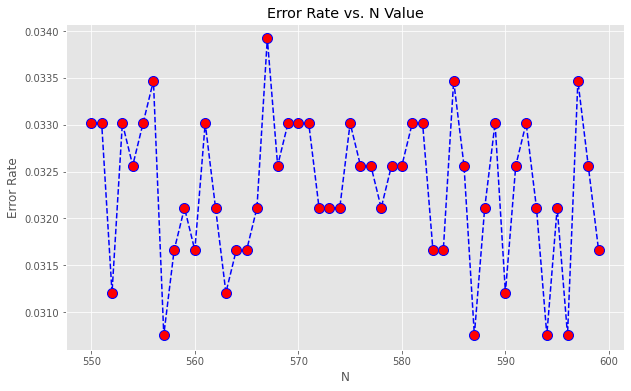

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(550,600),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. N Value')
plt.xlabel('N')
plt.ylabel('Error Rate')

In [ ]:
rfc = RandomForestClassifier(n_estimators=571)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       971
           1       0.97      0.97      0.97      1240

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [ ]:
print(confusion_matrix(y_test,predictions))

[[ 937   34]
 [  35 1205]]
